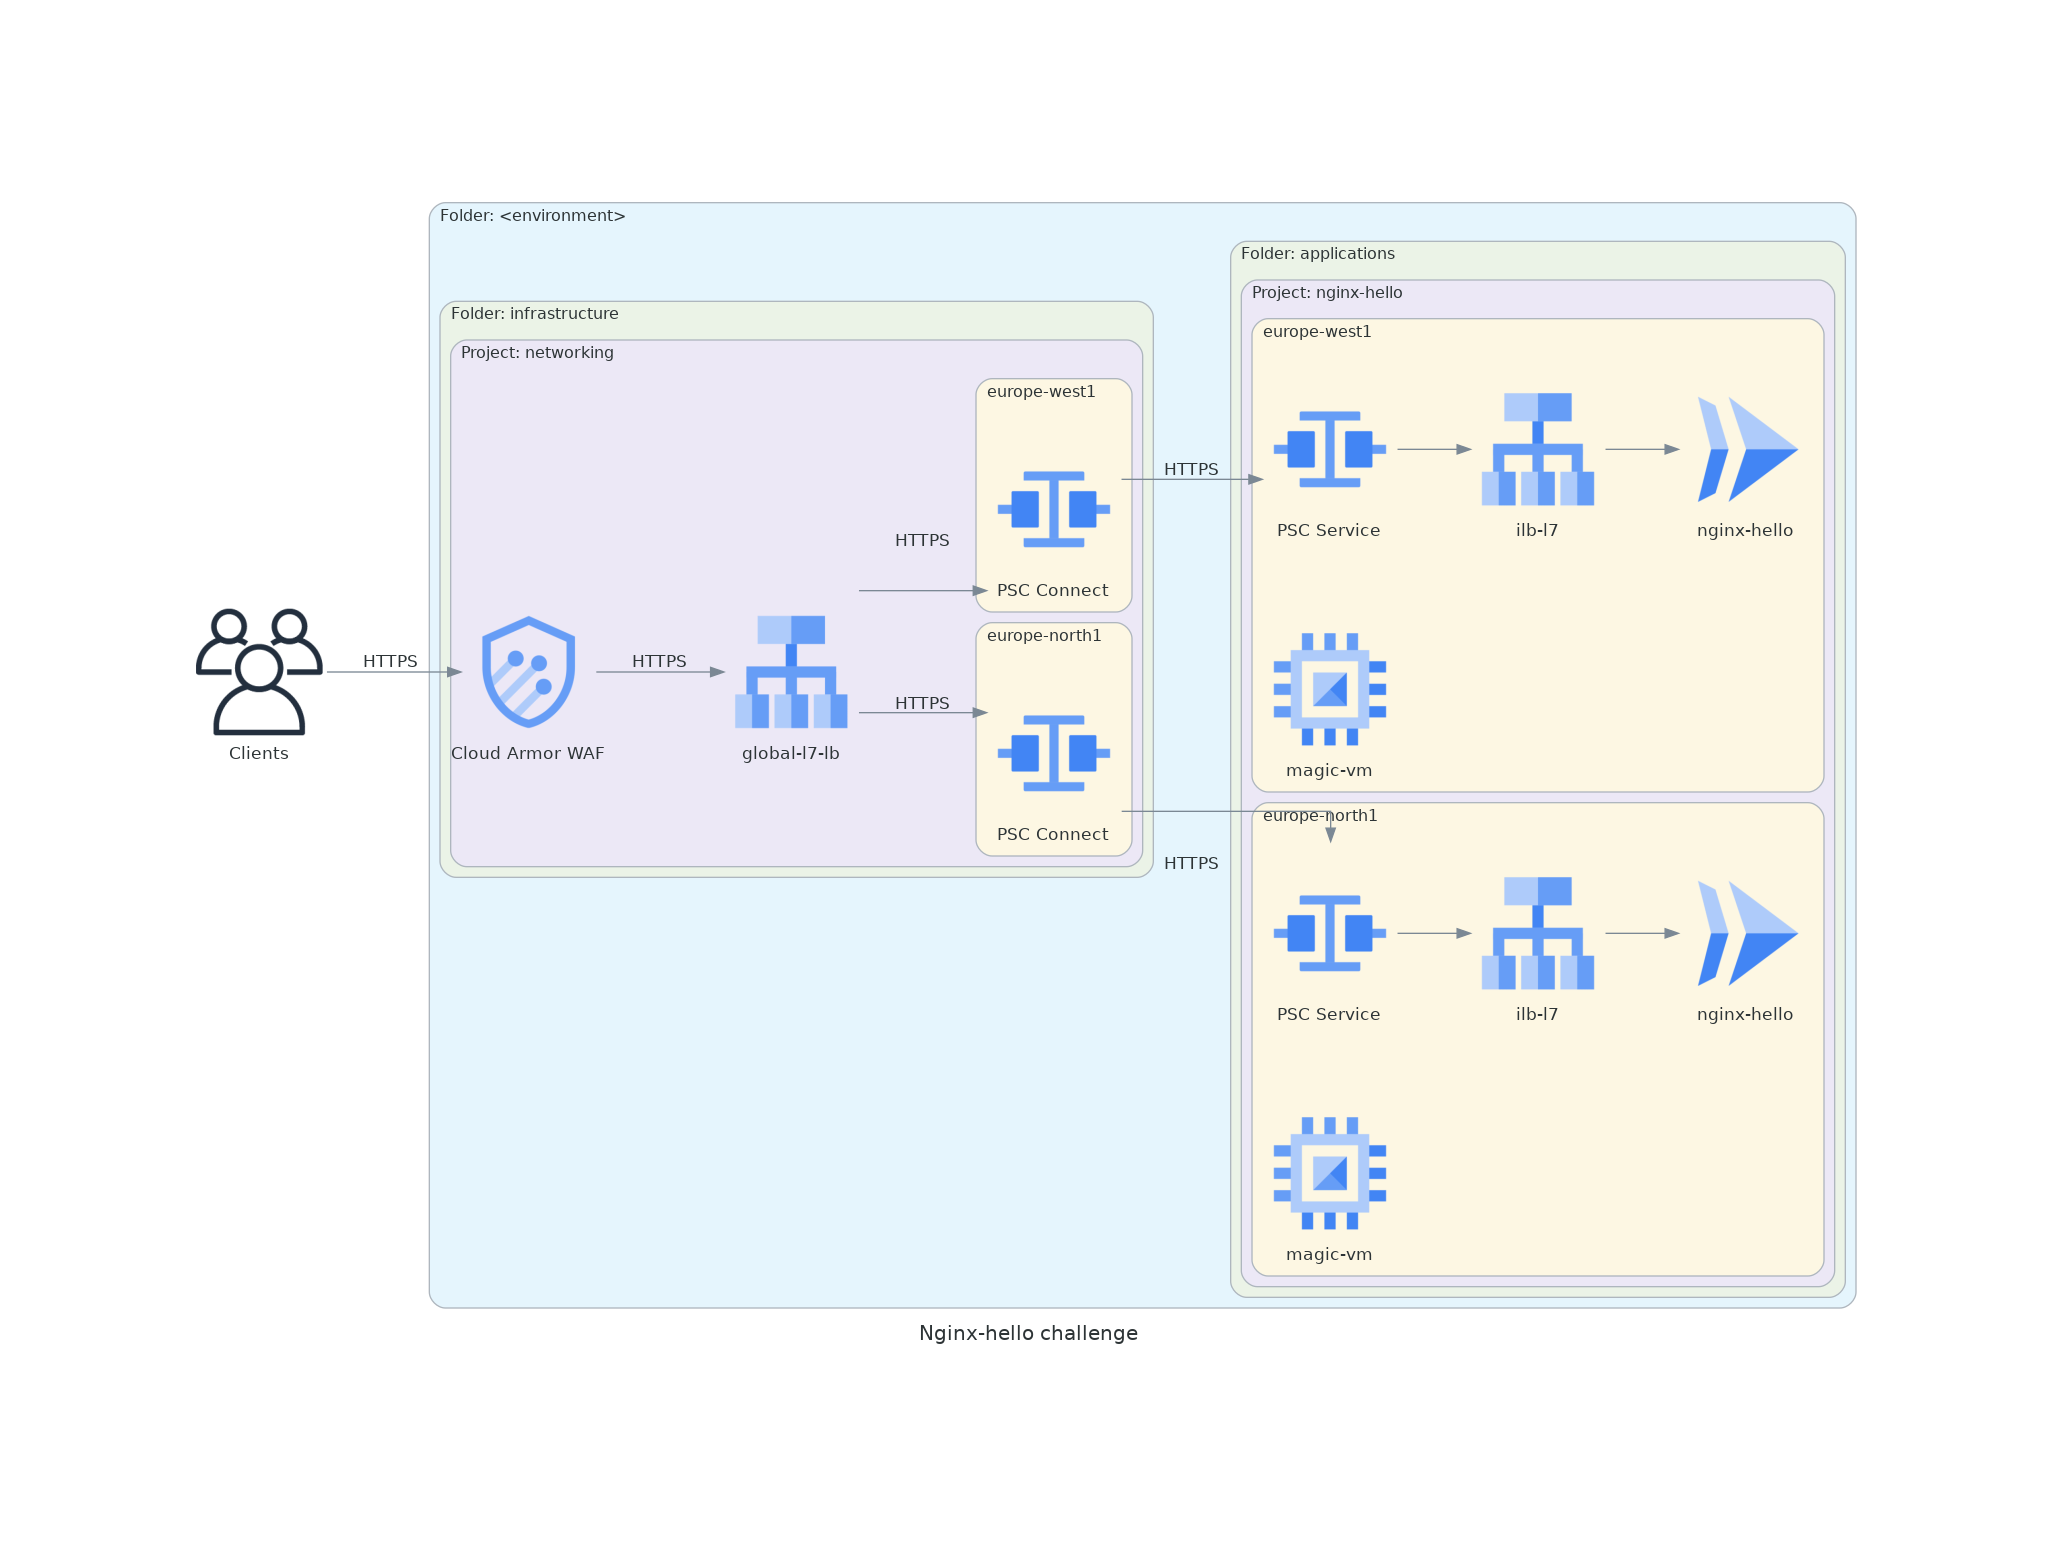

In [27]:
from diagrams import Cluster, Diagram, Edge
from diagrams.gcp.network import LoadBalancing
from diagrams.gcp.compute import Run
from diagrams.gcp.compute import GCE
from diagrams.gcp.network import Network
from diagrams.gcp.network import Armor
from diagrams.onprem.client import Users
from diagrams.gcp.network import PartnerInterconnect

with Diagram("Nginx-hello challenge", show=False) as diag:

    users = Users("Clients")
    
    regions = [ "europe-north1", "europe-west1" ]
    psc_clients = dict()
    psc_services = dict()
    cloudruns = dict()
    vms = dict()
    ilb = dict()
    
    with Cluster("Folder: <environment>"):
    
        with Cluster("Folder: infrastructure"):
            with Cluster("Project: networking"):
                for r in regions:
                    with Cluster(r):
                        psc_clients[r] = PartnerInterconnect("PSC Connect")

                armor = Armor("Cloud Armor WAF")
                loadbalancing = LoadBalancing("global-l7-lb")

        users >> Edge(label="HTTPS") >> armor >> Edge(label="HTTPS") >> loadbalancing 
        for r in regions:
            loadbalancing >> Edge(label="HTTPS") >> psc_clients[r]
        

        with Cluster("Folder: applications"):
            with Cluster("Project: nginx-hello"):

                for r in regions:
                    with Cluster(r):
                        psc_services[r] = PartnerInterconnect("PSC Service")
                        cloudruns[r] = Run("nginx-hello")
                        vms[r] = GCE(f"magic-vm")
                        ilb[r] = LoadBalancing("ilb-l7")
      
        for r in regions:
            psc_clients[r] >> Edge(label="HTTPS") >> psc_services[r] >> ilb[r] >> cloudruns[r]

diag


